# Ejercicio 1

Crear la libreria herramientas dentro de su carpeta de tareas, en su repositorio. Dentro deberán poner los métodos de Newton que construyeron, los métodos de integración, Euler independiente de dimensión (implícito y explícito)y Runge-Kutta independiente de dimensión. Recuerden que las rutinas deben funcionar solo con sus argumentos, no debe haber variables globales, todo lo que necesite la función para trabajar debe ser un argumento o una variable definida internamente.

In [1]:
using PyPlot
include("Herramientas.jl")

herramientas

# Mètodo de Newton

In [2]:
f(x)=x^3
df(x)=3x^2
herramientas.metodo_newton(0.5)

(3.1616420951060653 - 8.123155824057688e-19im,-3.802513859341161e-15 + 0.0im)

# Metodo de Biseccion

In [4]:
f(x) = x^3-x^2-x-1
herramientas.biseccion(0,5)

50-element Array{Float64,1}:
 -0.320389   
  0.0194169  
 -0.150486   
 -0.0655345  
 -0.0230588  
 -0.00182095 
  0.00879797 
  0.00348851 
  0.000833778
 -0.000493588
  0.000170095
 -0.000161746
  4.17465e-6 
  ⋮          
  1.30502e-12
  6.88122e-14
 -5.49291e-13
 -2.40239e-13
 -8.57135e-14
 -8.45062e-15
  3.01808e-14
  1.08651e-14
  1.20723e-15
 -3.6217e-15 
 -1.20723e-15
  0.0        

# Mètodos de Integraciòn

In [6]:
herramientas.Metodo_del_rectangulo(x->x^3+x^2+1,linspace(1,10,20))

2838.805055401662

In [7]:
herramientas.Metodo_del_trapecio(x->x^3+x^2+1,linspace(1,10,20))

2847.639889196676

In [8]:
herramientas.Metodo_Simpson(x->x^3+x^2+1,linspace(1,10,20))

1-element Array{Float64,1}:
 2841.75

# Mètodo de Euler independiente de dimensión (implícito y explícito)

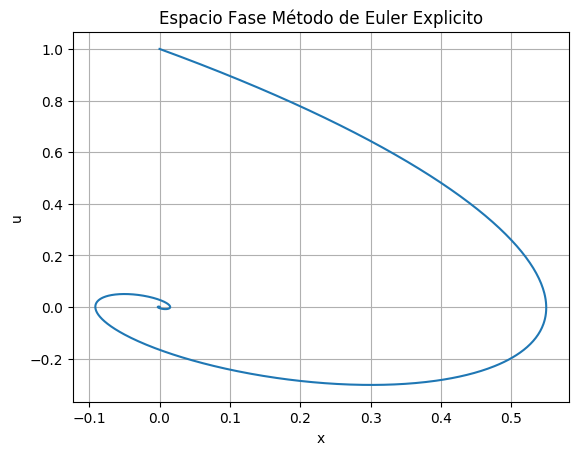

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7fcfa48e50>

In [15]:
f(x,t)=[1.0*x[2], -1.0*x[1]-1.0*x[2]]
list=0:0.01:100;
y=herramientas.euler_explicito(f,0:0.01:100,[0,1])
list1=map(x->x[1],y);
list2=map(x->x[2],y);
xlabel("x")
ylabel("u")
title("Espacio Fase Método de Euler Explicito")
grid("on")
plot(list1,list2)

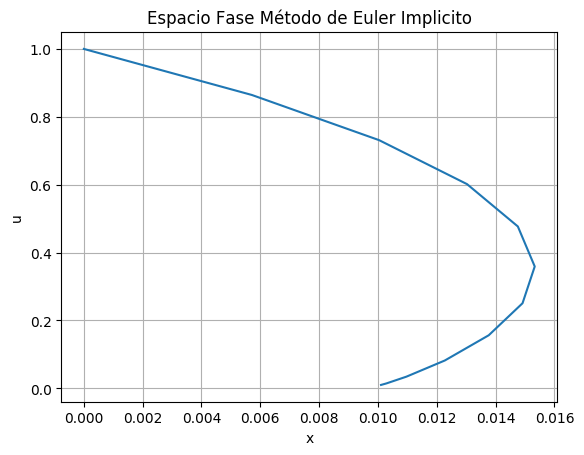

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7fcf99a450>

In [16]:
f(x,t)=3*(x[2])^2+x+1
df(x)=6x[2]+1
list=0:0.01:100;
y=herramientas.euler_implicito(f,df,0:0.01:100,[0,1])
list1=map(x->x[1],y);
list2=map(x->x[2],y);
xlabel("x")
ylabel("u")
title("Espacio Fase Método de Euler Implicito")
grid("on")
plot(list1,list2)

# Runge-Kutta

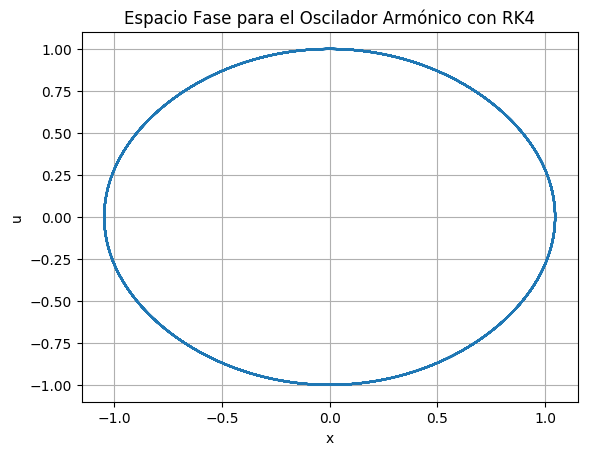

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7fcfb069d0>

In [14]:
f(x,t)=[x[2], -sin(x[1])]
list=0:0.01:100;
y=herramientas.RK4(f,0:0.01:100,[0,1])
list1=map(x->x[1],y);
list2=map(x->x[2],y);
xlabel("x")
ylabel("u")
title("Espacio Fase para el Oscilador Armónico con RK4")
grid("on")
plot(list1,list2)